# PHSX 616: Measuring the Speed of Light
## Dr. Micheal Murray
## Christian Argueta

In [83]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

# Reading the data

In [49]:
df = pd.read_csv("Photoelectric Effect Data - Sheet1.csv")
column_names = df.columns.tolist()
current_lists = {}


for i in range(1, 16):
    column_name = f'Current (Amps){i}'
    if column_name in df.columns:
        # Extract and assign the current list to the correct variable (I1, I2, ..., I13)
        current_lists[f'I{i}'] = df[column_name].tolist()
    else:
        # If a column is missing, we note it as missing for clarity
        current_lists[f'I{i}'] = 'Column not found in dataset'


## ∅2 Current

In [50]:
I1 = current_lists['I1'] #365 nm
I2 = current_lists['I2'] #405 nm
I3 = current_lists['I3'] #436 nm
I4 = current_lists['I4'] #546 nm
I5 = current_lists['I5'] #578 nm

## ∅4 files

In [51]:
I6 = current_lists['I6'] #365 nm
I7 = current_lists['I7'] #405 nm
I8 = current_lists['I8'] #436 nm
I9 = current_lists['I9'] #546 nm
I10 = current_lists['I10'] #578 nm

## ∅8 Current

In [52]:
I11 = current_lists['I11'] #365 nm
I12 = current_lists['I12'] #405 nm
I13 = current_lists['I13'] #436 nm
I14 = current_lists['I14'] #546 nm
I15 = current_lists['I15'] #578 nm
print(I15)

[-12, -12, -12, -12, -12, -12, -12, -12, -12, -12, -12, -12, -11, -11, -11, -5, 2, 12, 23, 32, 41, 49, 58, 67, 79, 87, 95, 100, 105, 110, 114, 118, 122]


## Now I want to plot them for ∅2

C:\Users\Christian\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


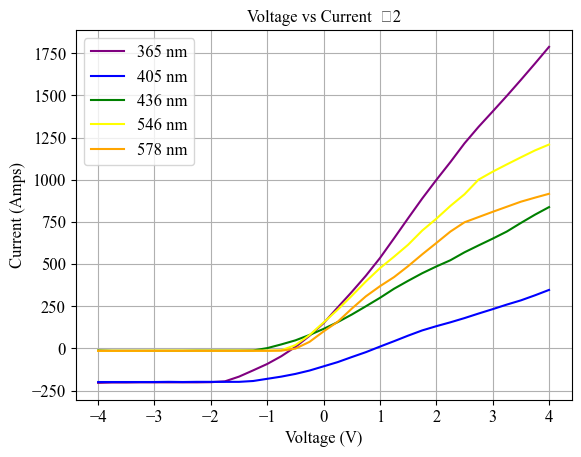

In [53]:
wavelengths = [365, 405, 436, 546, 578]

plt.plot(V, I1, label=f'{wavelengths[0]} nm', color='purple')
plt.plot(V, I2, label=f'{wavelengths[1]} nm', color='blue')
plt.plot(V, I3, label=f'{wavelengths[2]} nm', color='green')
plt.plot(V, I4, label=f'{wavelengths[3]} nm', color='yellow')
plt.plot(V, I5, label=f'{wavelengths[4]} nm', color='orange')

plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Current (Amps)', fontsize=12)
plt.title('Voltage vs Current  ∅2', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


##  ∅4

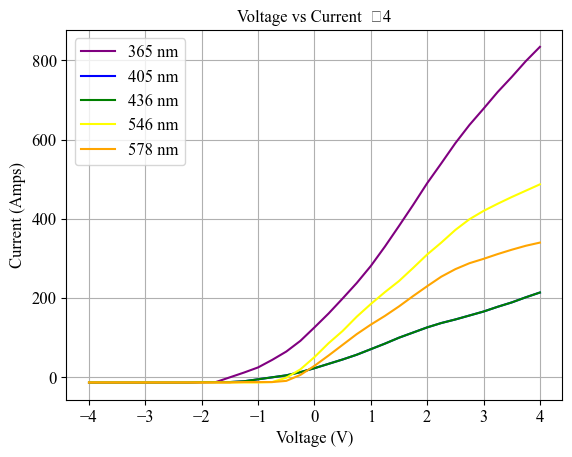

In [54]:
plt.plot(V, I6, label=f'{wavelengths[0]} nm', color='purple')
plt.plot(V, I7, label=f'{wavelengths[1]} nm', color='blue')
plt.plot(V, I8, label=f'{wavelengths[2]} nm', color='green')
plt.plot(V, I9, label=f'{wavelengths[3]} nm', color='yellow')
plt.plot(V, I10, label=f'{wavelengths[4]} nm', color='orange')

plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Current (Amps)', fontsize=12)
plt.title('Voltage vs Current  ∅4', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

##  ∅8

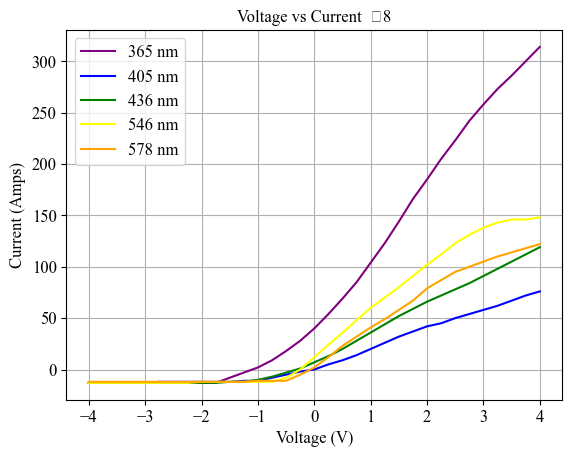

In [55]:
plt.plot(V, I11, label=f'{wavelengths[0]} nm', color='purple')
plt.plot(V, I12, label=f'{wavelengths[1]} nm', color='blue')
plt.plot(V, I13, label=f'{wavelengths[2]} nm', color='green')
plt.plot(V, I14, label=f'{wavelengths[3]} nm', color='yellow')
plt.plot(V, I15, label=f'{wavelengths[4]} nm', color='orange')

plt.xlabel('Voltage (V)', fontsize=12)
plt.ylabel('Current (Amps)', fontsize=12)
plt.title('Voltage vs Current  ∅8', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

In [56]:
print(I1)

[-204, -202, -202, -201, -201, -201, -201, -201, -200, -195, -167, -130, -92, -46, 9, 75, 150, 243, 335, 431, 536, 653, 772, 889, 999, 1105, 1216, 1314, 1405, 1497, 1592, 1689, 1788]


## Now I want to grab the stopping voltages and plot each one against frequency 

In [66]:
# Initialize a dictionary to hold the stopping voltage for each I1 to I13
stopping_voltages = {}

# Loop through I1 to I13 (since those are the ones identified with corresponding voltage columns)
for i in range(1, 16):
    # Current and voltage column names based on identified patterns
    current_column_name = f'Current (Amps){i}'
    voltage_column_name = f'Voltage (V){i}'

    # Check if both columns exist in the dataset to proceed
    if current_column_name in df.columns and voltage_column_name in df.columns:
        # Extract current and voltage values for this set
        currents = df[current_column_name].tolist()
        voltages = df[voltage_column_name].tolist()

        # Find the stopping voltage as the voltage at which current first becomes zero or close to zero
        stopping_voltage = None
        for v, c in zip(voltages, currents):
            if c >= 0:
                stopping_voltage = v
                break

        stopping_voltages[f'I{i}'] = stopping_voltage
    else:
        stopping_voltages[f'I{i}'] = 'Voltage or current column not found'

# Display the calculated stopping voltages for I1 to I13
stopping_voltages


{'I1': -0.5,
 'I2': 1.0,
 'I3': -1.0,
 'I4': -0.5,
 'I5': -0.25,
 'I6': -1.5,
 'I7': -0.75,
 'I8': -0.75,
 'I9': -0.25,
 'I10': -0.25,
 'I11': -1.0,
 'I12': 0.0,
 'I13': -0.25,
 'I14': -0.25,
 'I15': 0.0}

In [68]:
VS1 = -0.5
VS2 = 1.0
VS3 = -1.0
VS4 = -0.5
VS5 = -0.25

VS6 = -1.5
VS7 = -0.75
VS8 = -0.75
VS9 = -0.25
VS10 = -0.25

VS11 = -1.0
VS12 = 0.0
VS13 = -0.25
VS14 = -0.25  
VS15 = 0.0 

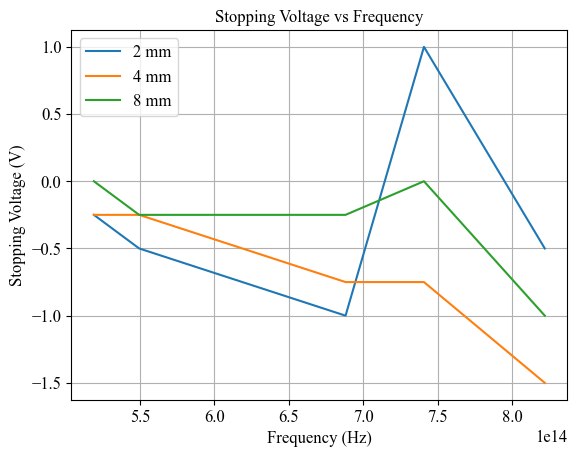

In [72]:
# Wavelengths given in nm
wavelengths_nm = [365, 405, 436, 546, 578]

# Convert wavelengths to frequencies (in Hz)
c = 3.00e8  # Speed of light in m/s
wavelengths_m = [wavelength * 1e-9 for wavelength in wavelengths_nm]  # Convert nm to m
frequencies_hz = [c / wavelength for wavelength in wavelengths_m]
plt.plot(frequencies_hz, [VS1, VS2, VS3, VS4, VS5], label='2 mm')
plt.plot(frequencies_hz, [VS6, VS7, VS8, VS9, VS10], label='4 mm')
plt.plot(frequencies_hz, [VS11, VS12, VS13, VS14, VS15], label='8 mm')

plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Stopping Voltage (V)', fontsize=12)
plt.title('Stopping Voltage vs Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


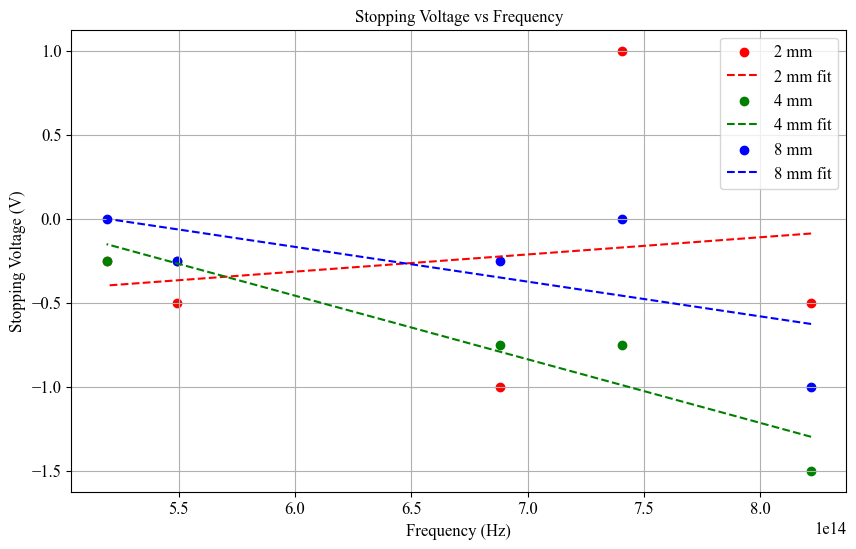

In [77]:
# Define the function to fit the data
def linear(x, m, c):
    return m * x + c

# Fit the data for 2 mm
popt_2mm, _ = curve_fit(linear, frequencies_hz, [VS1, VS2, VS3, VS4, VS5])
m_2mm, c_2mm = popt_2mm

# Fit the data for 4 mm
popt_4mm, _ = curve_fit(linear, frequencies_hz, [VS6, VS7, VS8, VS9, VS10])
m_4mm, c_4mm = popt_4mm

# Fit the data for 8 mm
popt_8mm, _ = curve_fit(linear, frequencies_hz, [VS11, VS12, VS13, VS14, VS15])
m_8mm, c_8mm = popt_8mm

# Plot the data and the fitted lines
plt.figure(figsize=(10, 6))
plt.scatter(frequencies_hz, [VS1, VS2, VS3, VS4, VS5], color='red', marker='o', label='2 mm')
plt.plot(frequencies_hz, linear(np.array(frequencies_hz), *popt_2mm), color='red', linestyle='--', label='2 mm fit')

plt.scatter(frequencies_hz, [VS6, VS7, VS8, VS9, VS10], color='green', marker='o', label='4 mm')
plt.plot(frequencies_hz, linear(np.array(frequencies_hz), *popt_4mm), color='green', linestyle='--', label='4 mm fit')

plt.scatter(frequencies_hz, [VS11, VS12, VS13, VS14, VS15], color='blue', marker='o', label='8 mm')
plt.plot(frequencies_hz, linear(np.array(frequencies_hz), *popt_8mm), color='blue', linestyle='--', label='8 mm fit')

plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Stopping Voltage (V)', fontsize=12)
plt.title('Stopping Voltage vs Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
pdf_filename = 'PhotoelectricEffectData.pdf'
plt.savefig(pdf_filename)

# Confirming the file has been saved
pdf_filename
plt.show()


# Now for the residuals

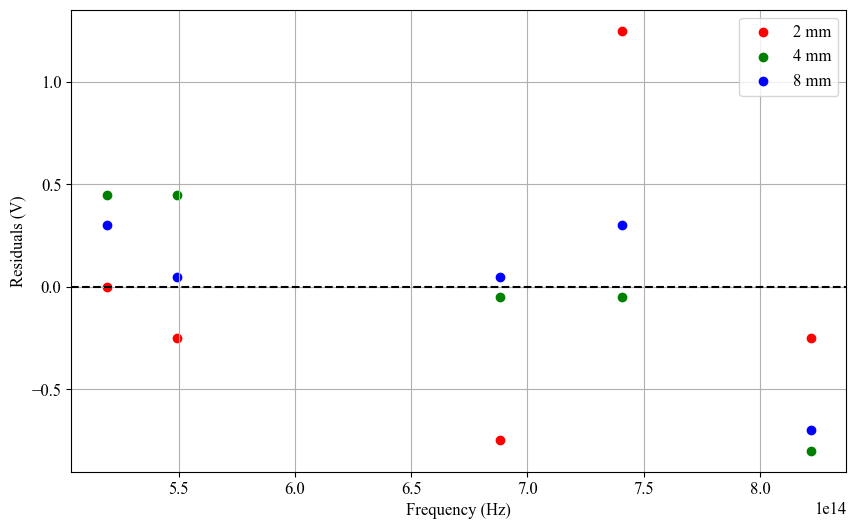

(2.25, 1.05, 0.6749999999999998)

In [81]:

# Calculating the average stopping voltages for each group as simple baselines for residuals
average_stopping_voltage_2mm = np.mean([VS1, VS2, VS3, VS4, VS5])
average_stopping_voltage_4mm = np.mean([VS6, VS7, VS8, VS9, VS10])
average_stopping_voltage_8mm = np.mean([VS11, VS12, VS13, VS14, VS15])

# Calculating residuals for each group
residuals_2mm = np.array([VS1, VS2, VS3, VS4, VS5]) - average_stopping_voltage_2mm
residuals_4mm = np.array([VS6, VS7, VS8, VS9, VS10]) - average_stopping_voltage_4mm
residuals_8mm = np.array([VS11, VS12, VS13, VS14, VS15]) - average_stopping_voltage_8mm

# Plotting the residual plots for all groups
plt.figure(figsize=(10, 6))

plt.scatter(frequencies_hz, residuals_2mm, color='red', marker='o', label='2 mm')
plt.scatter(frequencies_hz, residuals_4mm, color='green', marker='o', label='4 mm')
plt.scatter(frequencies_hz, residuals_8mm, color='blue', marker='o', label='8 mm')

plt.axhline(0, color='black', linestyle='--')  # Add a line at y=0 for reference

plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Residuals (V)', fontsize=12)

plt.legend(fontsize=12)
plt.grid(True)

plt.show()
# Calculate the chi-squared values for each fit
chi_squared_2mm = np.sum((residuals_2mm) ** 2)
chi_squared_4mm = np.sum((residuals_4mm) ** 2)
chi_squared_8mm = np.sum((residuals_8mm) ** 2)

chi_squared_2mm, chi_squared_4mm, chi_squared_8mm

# Now combine!

'PhotoelectricEffectData.pdf'

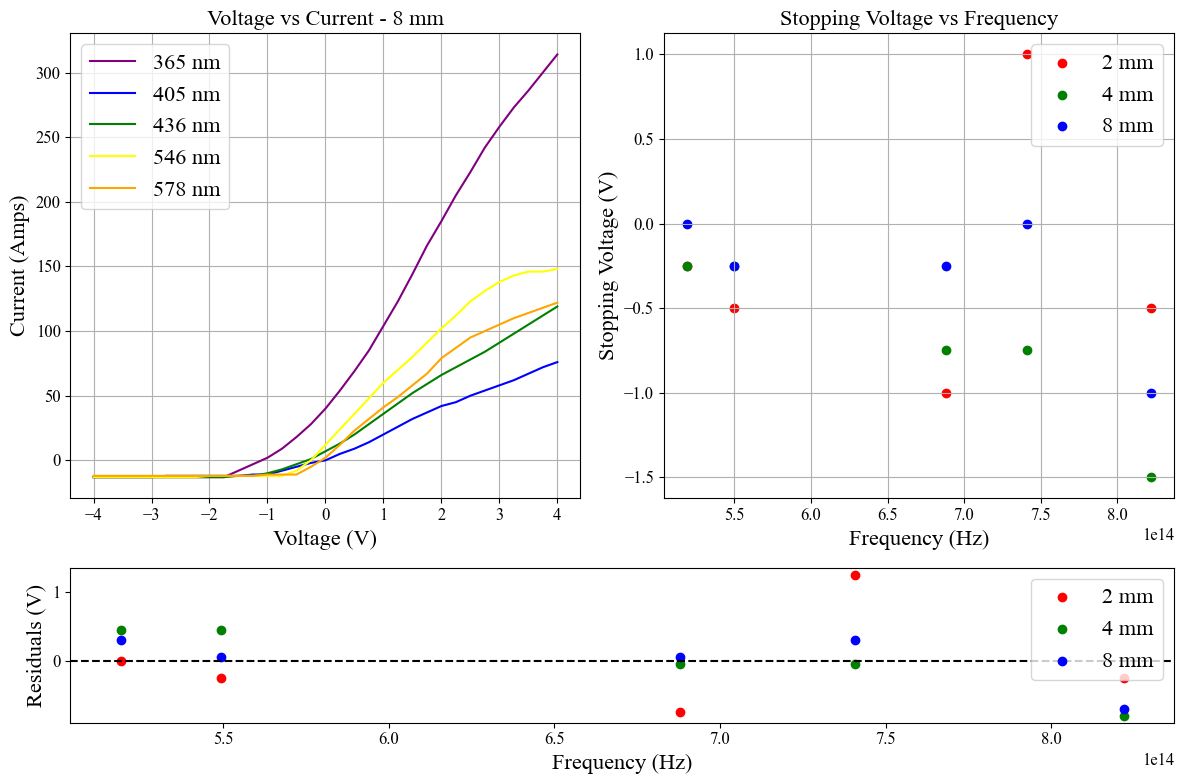

In [89]:
plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(2, 2, height_ratios=[3, 1])  # GridSpec should define the layout for 2 rows and 2 columns

# Use gs to place each subplot in the correct location

# Laser plot in the top-left position
ax0 = plt.subplot(gs[0, 0])
plt.plot(V, I11, label=f'{wavelengths[0]} nm', color='purple')
plt.plot(V, I12, label=f'{wavelengths[1]} nm', color='blue')
plt.plot(V, I13, label=f'{wavelengths[2]} nm', color='green')
plt.plot(V, I14, label=f'{wavelengths[3]} nm', color='yellow')
plt.plot(V, I15, label=f'{wavelengths[4]} nm', color='orange')

plt.xlabel('Voltage (V)', fontsize=16)
plt.ylabel('Current (Amps)', fontsize=16)
plt.title('Voltage vs Current - 8 mm', fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)

# Bulb plot in the top-right position
# Bulb plot in the top-right position
ax1 = plt.subplot(gs[0, 1])
ax1.scatter(frequencies_hz, [VS1, VS2, VS3, VS4, VS5], color='red', marker='o', label='2 mm')
ax1.scatter(frequencies_hz, [VS6, VS7, VS8, VS9, VS10], color='green', marker='o', label='4 mm')
ax1.scatter(frequencies_hz, [VS11, VS12, VS13, VS14, VS15], color='blue', marker='o', label='8 mm')

ax1.set_xlabel('Frequency (Hz)', fontsize=16)
ax1.set_ylabel('Stopping Voltage (V)', fontsize=16)
ax1.set_title('Stopping Voltage vs Frequency', fontsize=16)
ax1.legend(fontsize=16)
ax1.grid(True)

# Residual plot in the bottom spanned across both columns
ax2 = plt.subplot(gs[1, :])  # Spanning the residual plot across both columns
ax2.scatter(frequencies_hz, residuals_2mm, color='red', marker='o', label='2 mm')
ax2.scatter(frequencies_hz, residuals_4mm, color='green', marker='o', label='4 mm')
ax2.scatter(frequencies_hz, residuals_8mm, color='blue', marker='o', label='8 mm')

ax2.axhline(0, color='black', linestyle='--')  # Add a line at y=0 for reference

ax2.set_xlabel('Frequency (Hz)', fontsize=16)
ax2.set_ylabel('Residuals (V)', fontsize=16)
ax2.legend(fontsize=16)

plt.tight_layout()

# Saving the entire figure as a PDF
pdf_filename = 'PhotoelectricEffectData.pdf'
plt.savefig(pdf_filename)

pdf_filename

# Calculate the ChiSq

In [90]:
#Calculating the chi-squared values for each fit
chi_squared_2mm = np.sum((residuals_2mm) ** 2)
chi_squared_4mm = np.sum((residuals_4mm) ** 2)
chi_squared_8mm = np.sum((residuals_8mm) ** 2)

chi_squared_2mm, chi_squared_4mm, chi_squared_8mm

(2.25, 1.05, 0.6749999999999998)